In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import hddm
import os
from patsy import dmatrix  # for generation of (regression) design matrices
import numpy as np         # for basic matrix operations
from pandas import Series  # to manipulate data-frames generated by hddm
from kabuki.analyze import check_geweke
from kabuki.analyze import gelman_rubin

import sys
sys.stdout = open('ModelRecoveryOutput.txt', 'w')

baseDir = ''
os.chdir(baseDir)

/Users/donal/anaconda/envs/py352/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
pe_data_desCode_tr = hddm.load_csv('./pilotExp_forHDDM_desCode.csv')
pe_data_facCode_tr = hddm.load_csv('./pilotExp_forHDDM_facCode.csv')
me_data_desCode_tr = hddm.load_csv('./mainExp_forHDDM_desCode.csv')
me_data_facCode_tr = hddm.load_csv('./mainExp_forHDDM_facCode.csv')

In [5]:
pe_m01a = hddm.HDDMRegressor(pe_data_desCode_tr,"v ~ 0 + C(desWorld)",informative=False,p_outlier=0.05,include=('z','sz'),group_only_nodes=(['sz']))
me_m01a = hddm.HDDMRegressor(me_data_desCode_tr,"v ~ 0 + C(desWorld)",informative=False,p_outlier=0.05,include=('z','sz'),group_only_nodes=(['sz']))
pe_m04a = hddm.HDDMRegressor(pe_data_facCode_tr,"v ~ 0 + C(whichWorld)",informative=False,p_outlier=0.05,include=('z','sz'),group_only_nodes=(['sz']))
me_m04a = hddm.HDDMRegressor(me_data_facCode_tr,"v ~ 0 + C(whichWorld)",informative=False,p_outlier=0.05,include=('z','sz'),group_only_nodes=(['sz']))

pe_m01a.sample(20000, burn=5000, dbname='pe_m01a_traces.db', db='pickle')
me_m01a.sample(20000, burn=5000, dbname='me_m01a_traces.db', db='pickle')
pe_m04a.sample(20000, burn=5000, dbname='pe_m04a_traces.db', db='pickle')
me_m04a.sample(20000, burn=5000, dbname='me_m04a_traces.db', db='pickle')

pe_m01a.print_stats('pilotExp_m01a_params.txt')
me_m01a.print_stats('mainExp_params.txt')
pe_m04a.print_stats('pilotExp_m04a_params.txt')
me_m04a.print_stats('mainExp_m04a_params.txt')

pe_m01a_ppc100 = hddm.utils.post_pred_gen(pe_m01a,samples=100,append_data=True)
me_m01a_ppc100 = hddm.utils.post_pred_gen(me_m01a,samples=100,append_data=True)
pe_m04a_ppc100 = hddm.utils.post_pred_gen(pe_m04a,samples=100,append_data=True)
me_m04a_ppc100 = hddm.utils.post_pred_gen(me_m04a,samples=100,append_data=True)

pe_m01a_ppc100.to_csv('pilotExp_m01a_ppc.csv')
me_m01a_ppc100.to_csv('mainExp_m01a_ppc.csv')
pe_m04a_ppc100.to_csv('pilotExp_m04a_ppc.csv')
me_m04a_ppc100.to_csv('mainExp_m04a_ppc.csv')




/Users/donal/anaconda/envs/py352/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']
/Users/donal/anaconda/envs/py352/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


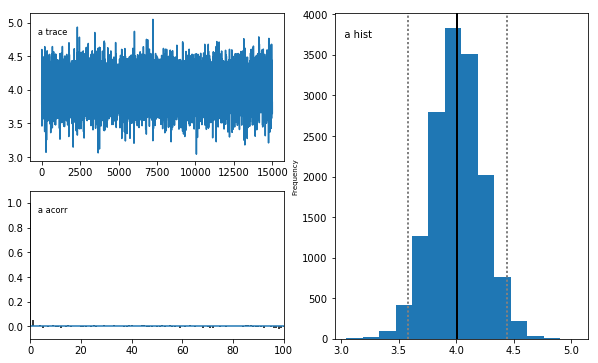

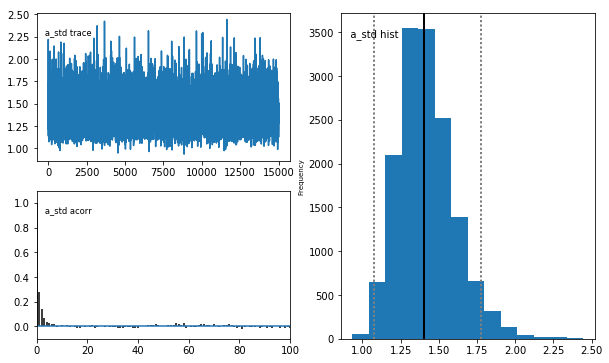

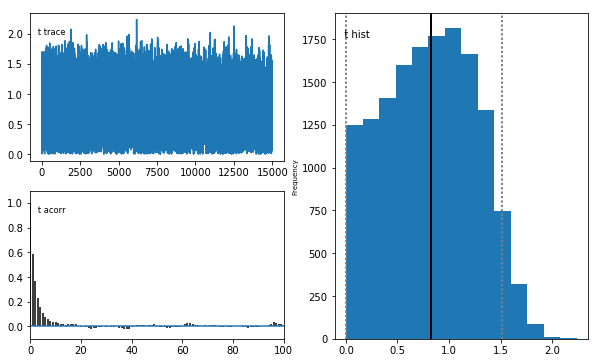

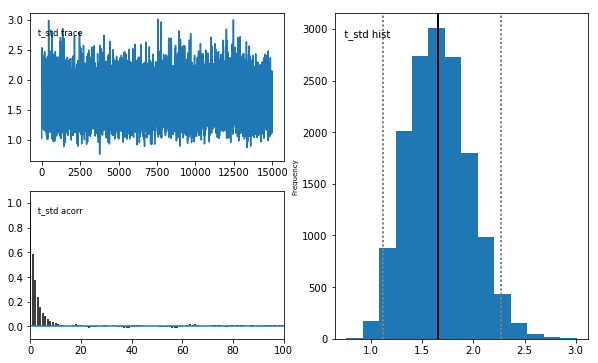

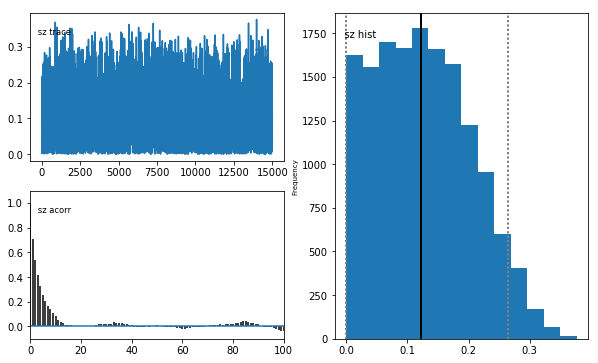

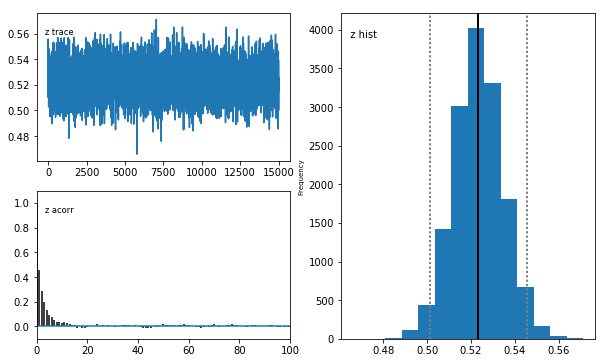

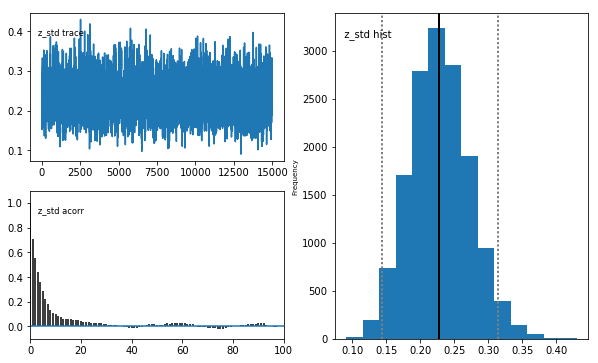

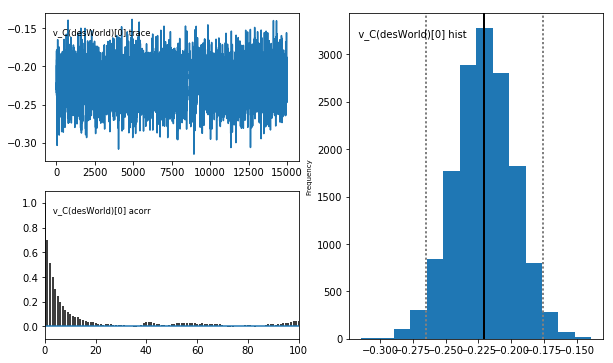

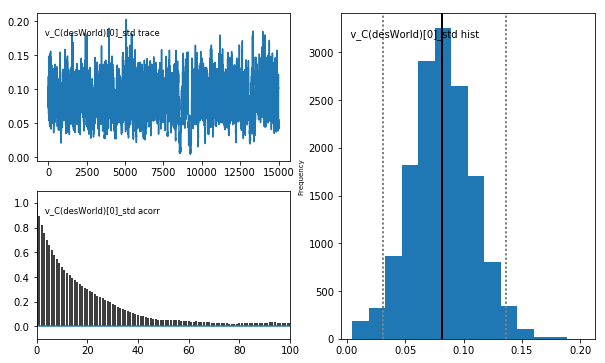

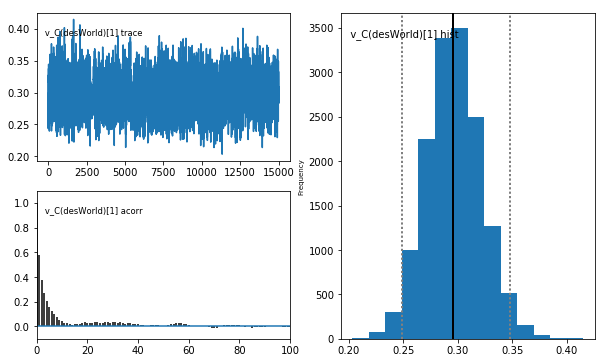

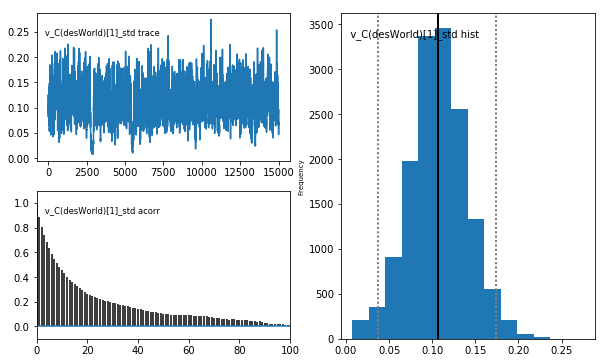

In [6]:
e13a_m01a.plot_posteriors()

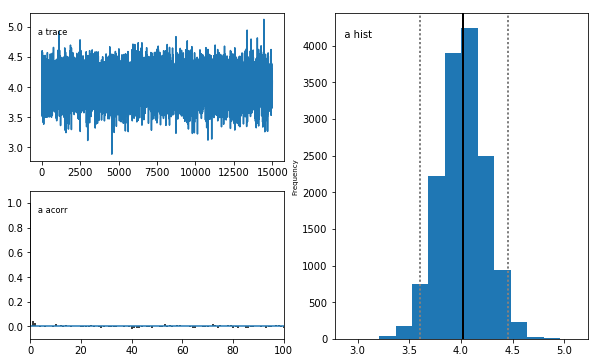

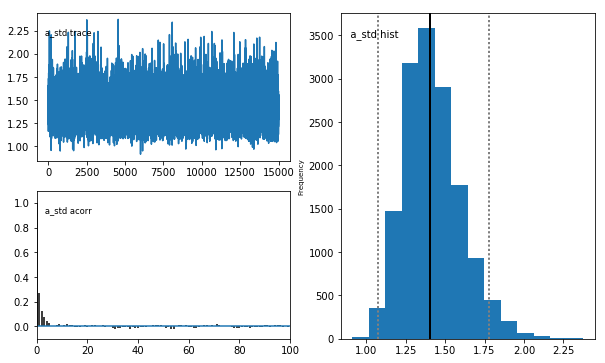

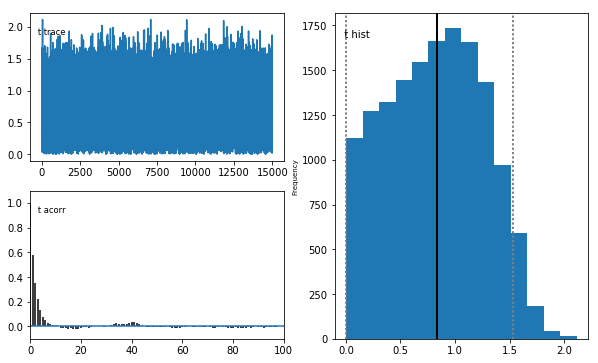

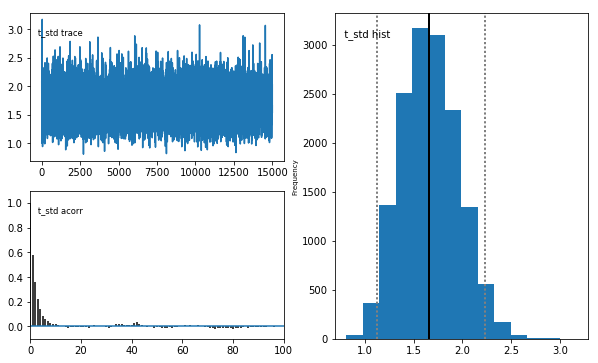

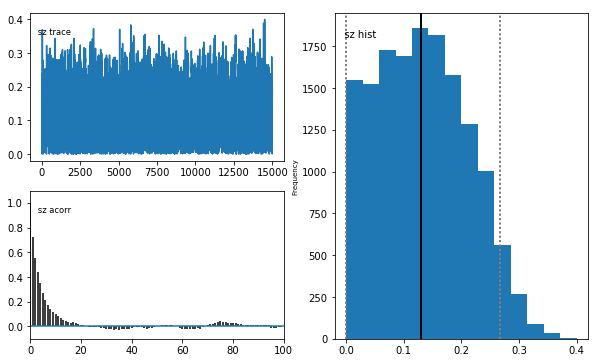

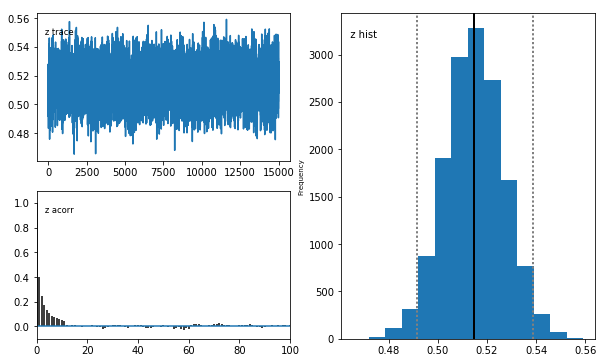

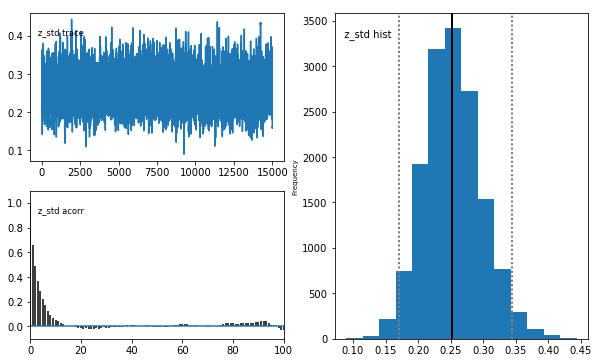

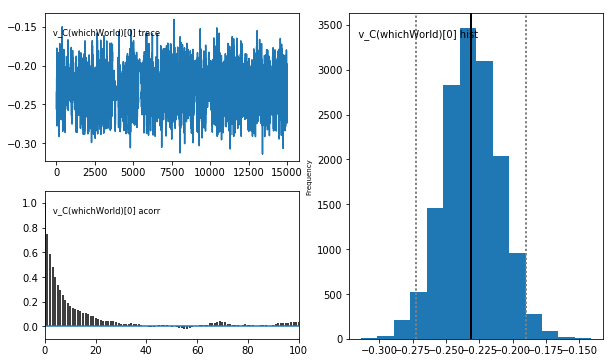

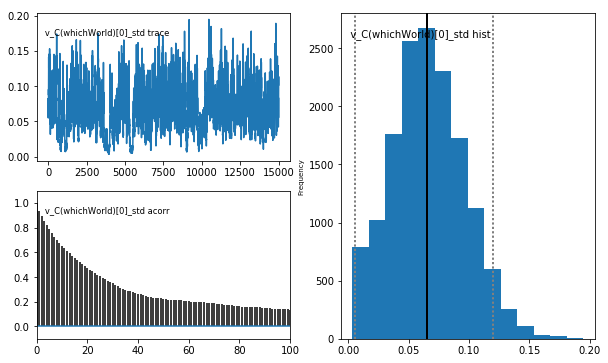

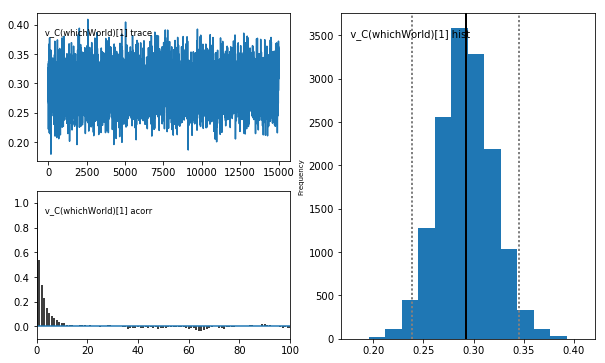

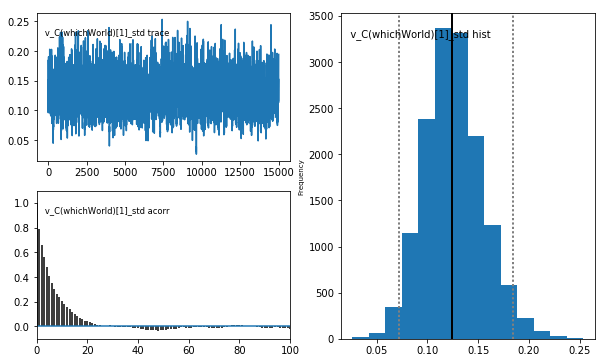

In [8]:
e13a_m04a.plot_posteriors()

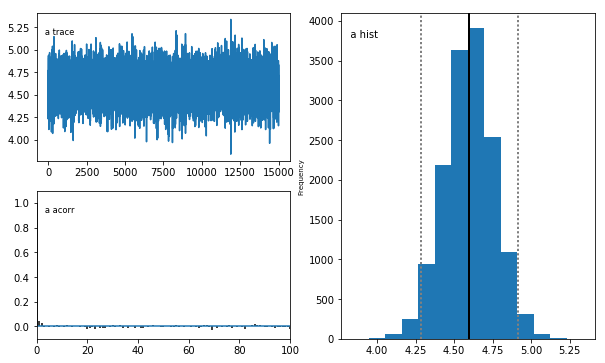

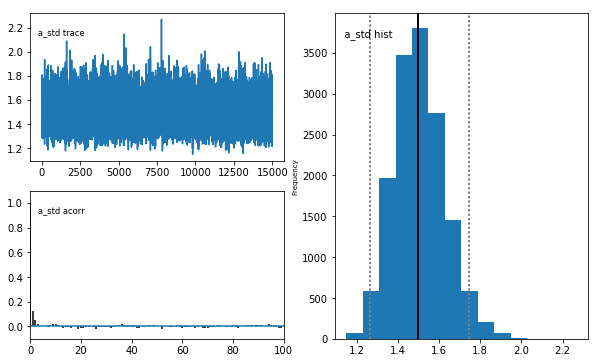

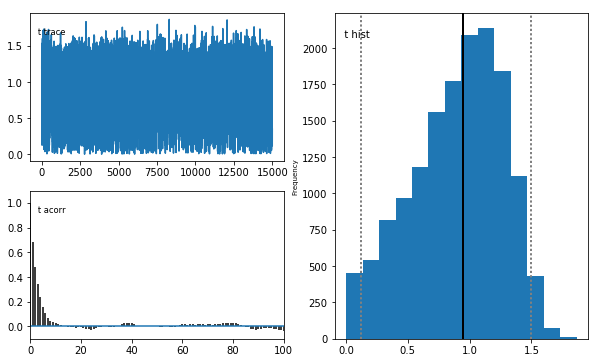

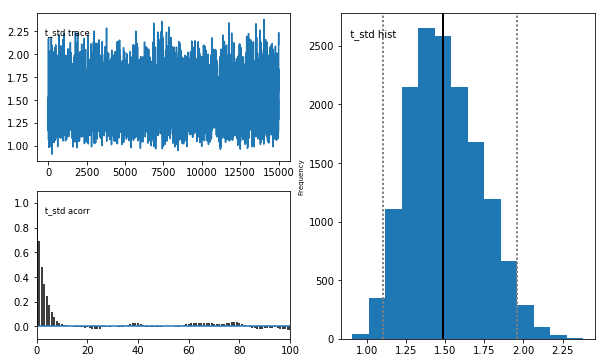

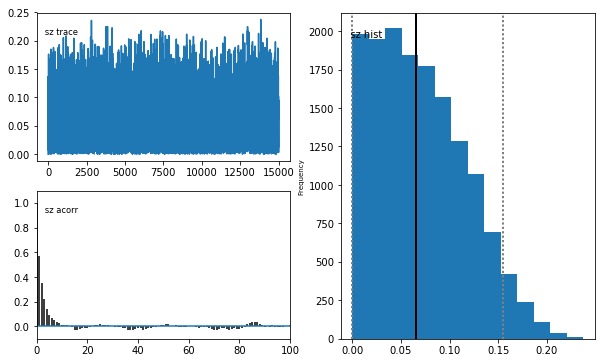

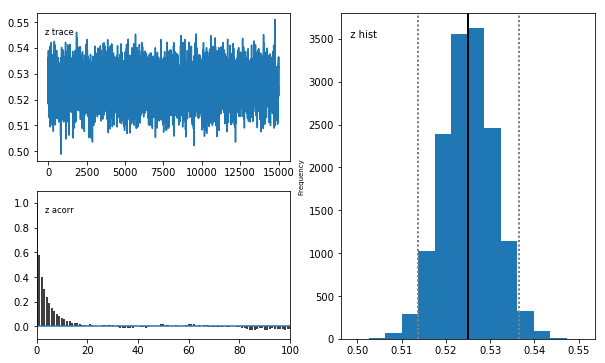

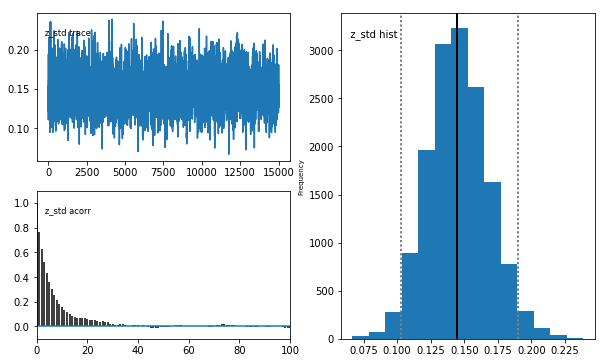

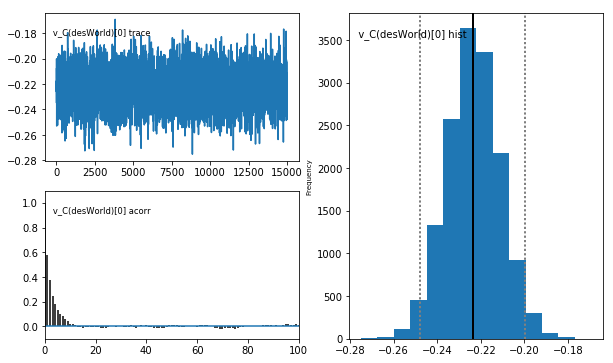

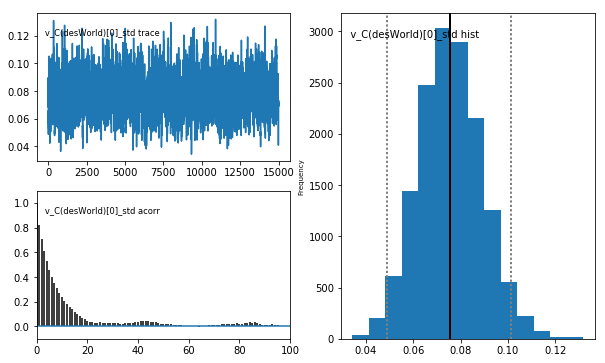

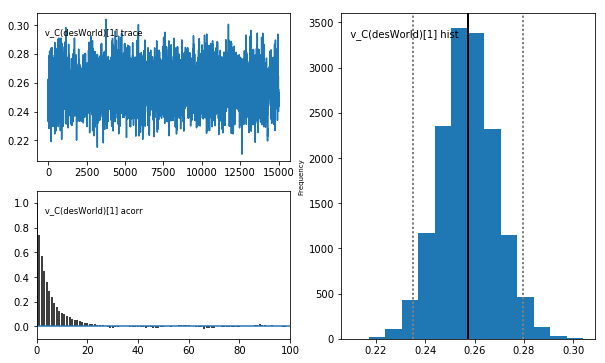

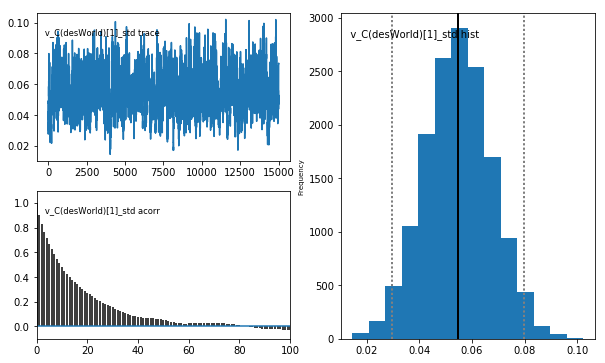

In [9]:
e13c_m01a.plot_posteriors()

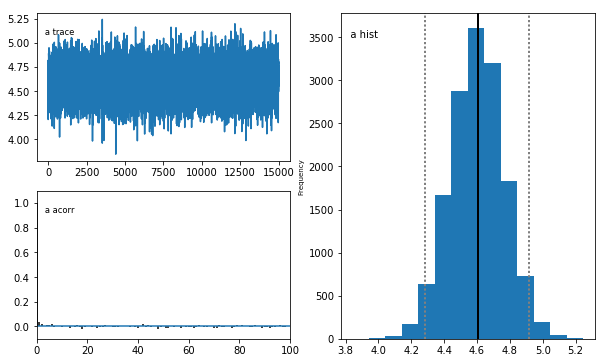

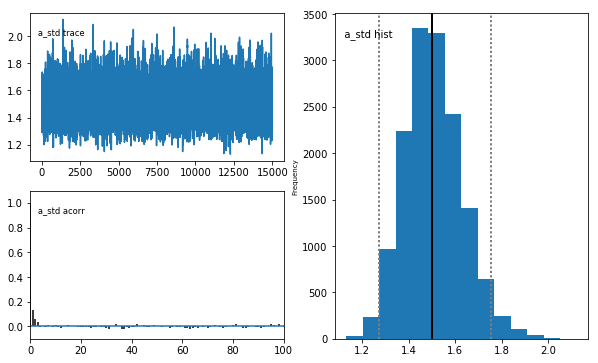

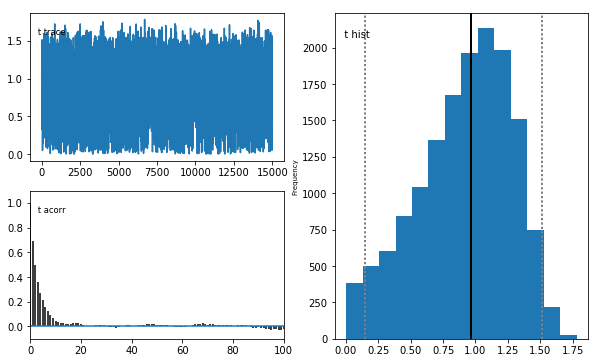

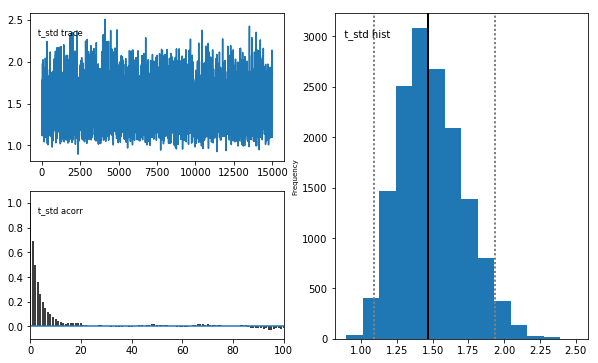

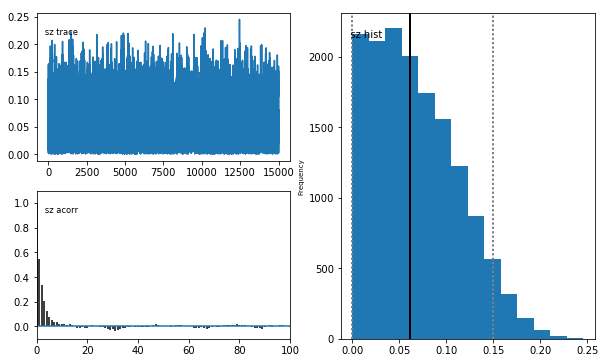

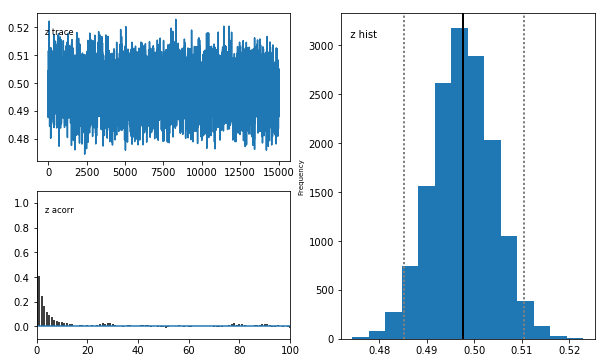

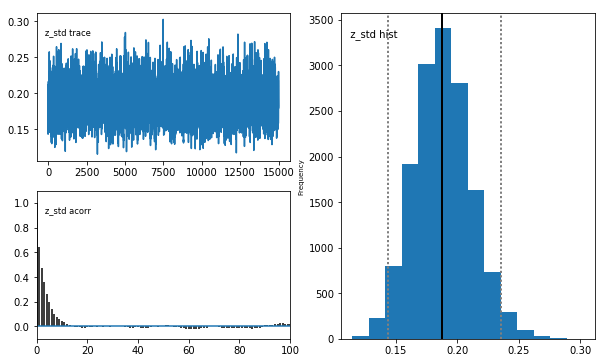

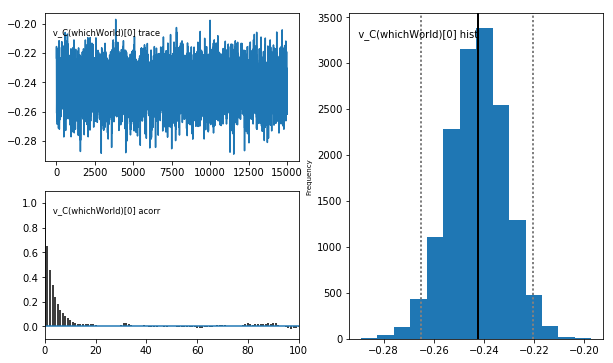

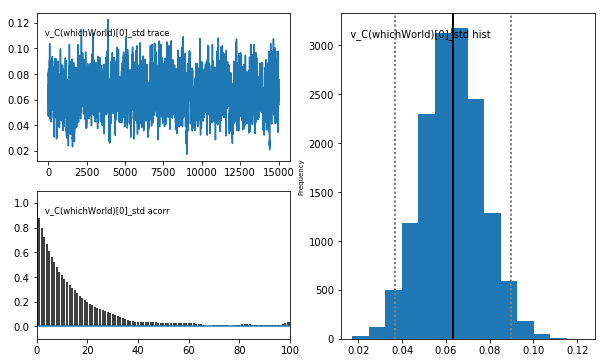

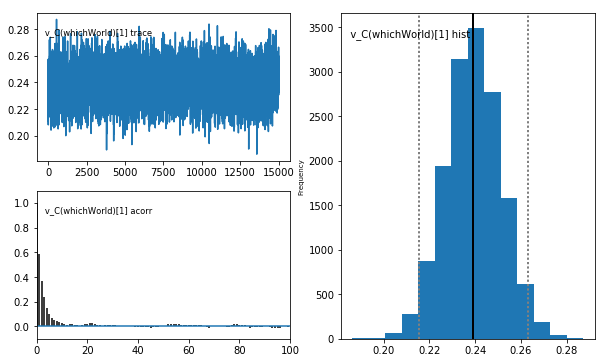

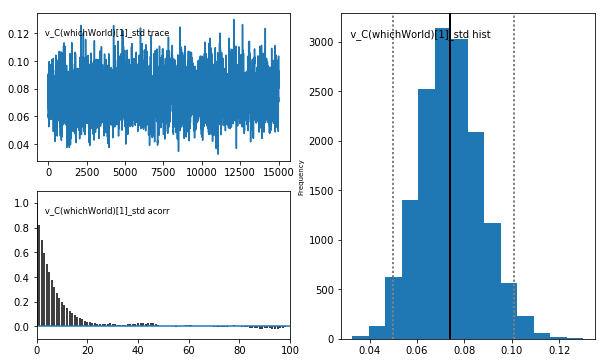

In [10]:
e13c_m04a.plot_posteriors()

In [24]:
e13a_m01a_v1,e13a_m01a_v0,e13a_m01a_z = e13a_m01a.nodes_db.node[['v_C(desWorld)[1]','v_C(desWorld)[0]','z']]
e13c_m01a_v1,e13c_m01a_v0,e13c_m01a_z = e13c_m01a.nodes_db.node[['v_C(desWorld)[1]','v_C(desWorld)[0]','z']]
e13a_m04a_v1,e13a_m04a_v0,e13a_m04a_z = e13a_m04a.nodes_db.node[['v_C(whichWorld)[1]','v_C(whichWorld)[0]','z']]
e13c_m04a_v1,e13c_m04a_v0,e13c_m04a_z = e13c_m04a.nodes_db.node[['v_C(whichWorld)[1]','v_C(whichWorld)[0]','z']]

In [25]:
e13a_m01a_v1 = e13a_m01a_v1.trace()
e13a_m01a_v0 = e13a_m01a_v0.trace()
e13a_m01a_z = e13a_m01a_z.trace()
e13c_m01a_v1 = e13c_m01a_v1.trace()
e13c_m01a_v0 = e13c_m01a_v0.trace()
e13c_m01a_z = e13c_m01a_z.trace()
e13a_m04a_v1 = e13a_m04a_v1.trace()
e13a_m04a_v0 = e13a_m04a_v0.trace()
e13a_m04a_z = e13a_m04a_z.trace()
e13c_m04a_v1 = e13c_m04a_v1.trace()
e13c_m04a_v0 = e13c_m04a_v0.trace()
e13c_m04a_z = e13c_m04a_z.trace()

In [26]:
np.savetxt("e13a_m01a_v0.csv",e13a_m01a_v0,delimiter=",")
np.savetxt("e13c_m01a_v0.csv",e13c_m01a_v0,delimiter=",")
np.savetxt("e13a_m04a_v0.csv",e13a_m04a_v0,delimiter=",")
np.savetxt("e13c_m04a_v0.csv",e13c_m04a_v0,delimiter=",")

np.savetxt("e13a_m01a_v1.csv",e13a_m01a_v1,delimiter=",")
np.savetxt("e13c_m01a_v1.csv",e13c_m01a_v1,delimiter=",")
np.savetxt("e13a_m04a_v1.csv",e13a_m04a_v1,delimiter=",")
np.savetxt("e13c_m04a_v1.csv",e13c_m04a_v1,delimiter=",")

np.savetxt("e13a_m01a_z.csv",e13a_m01a_z,delimiter=",")
np.savetxt("e13c_m01a_z.csv",e13c_m01a_z,delimiter=",")
np.savetxt("e13a_m04a_z.csv",e13a_m04a_z,delimiter=",")
np.savetxt("e13c_m04a_z.csv",e13c_m04a_z,delimiter=",")

# extra version just in case
- point 1
  - subpoint a
  - subpoint b

In [ ]:
# just in case, since dbname was erroneous above

e13a_m01a.sample(20000, burn=5000, dbname='e13a_m01a_traces.db', db='pickle')
e13a_m04a.sample(20000, burn=5000, dbname='e13a_m04a_traces.db', db='pickle')

e13a_m01a.print_stats('e13a_m01a_params.txt')
e13a_m04a.print_stats('e13a_m04a_params.txt')

e13a_m01a_ppc100 = hddm.utils.post_pred_gen(e13a_m01a,samples=100,append_data=True)
e13a_m04a_ppc100 = hddm.utils.post_pred_gen(e13a_m04a,samples=100,append_data=True)

e13a_m01a_ppc100.to_csv('e13a_m01a_ppc.csv')
e13a_m04a_ppc100.to_csv('e13a_m04a_ppc.csv')

In [ ]:
e13a_m01a.save('e13a_m01a_model')
e13c_m01a.save('e13c_m01a_model')
e13a_m04a.save('e13a_m04a_model')
e13c_m04a.save('e13c_m04a_model')